# Chapter 10. Applications and Development of Linear Algebra

## 10.1. Linear equations and least squares

**Program:** [lstsqr.py](./10.1/lstsqr.py)

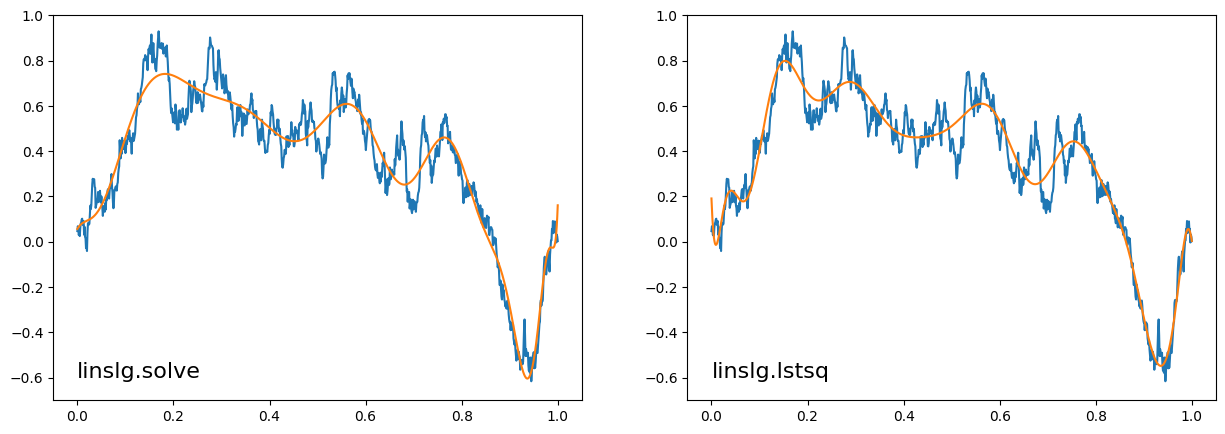

In [1]:
from numpy import array, linspace, sqrt, random, linalg
import matplotlib.pyplot as plt

n, m = 30, 1000
random.seed(2021)
x = linspace(0.0, 1.0, m)
w = random.normal(0.0, sqrt(1.0/m), m)
y = w.cumsum()
tA = array([x**j for j in range(n + 1)])
A = tA.T
S = linalg.solve(tA.dot(A), tA.dot(y))
L = linalg.lstsq(A, y, rcond=None)[0]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for ax, B, title in zip(axs, [S, L], ['solve', 'lstsq']):
    z = B.dot(tA)
    ax.plot(x, y), ax.plot(x, z), ax.set_ylim(-0.7, 1)
    ax.text(0, -0.6, f'linslg.{title}', fontsize=16)

---

**Program:** [moji.py](./10.1/moji.py)

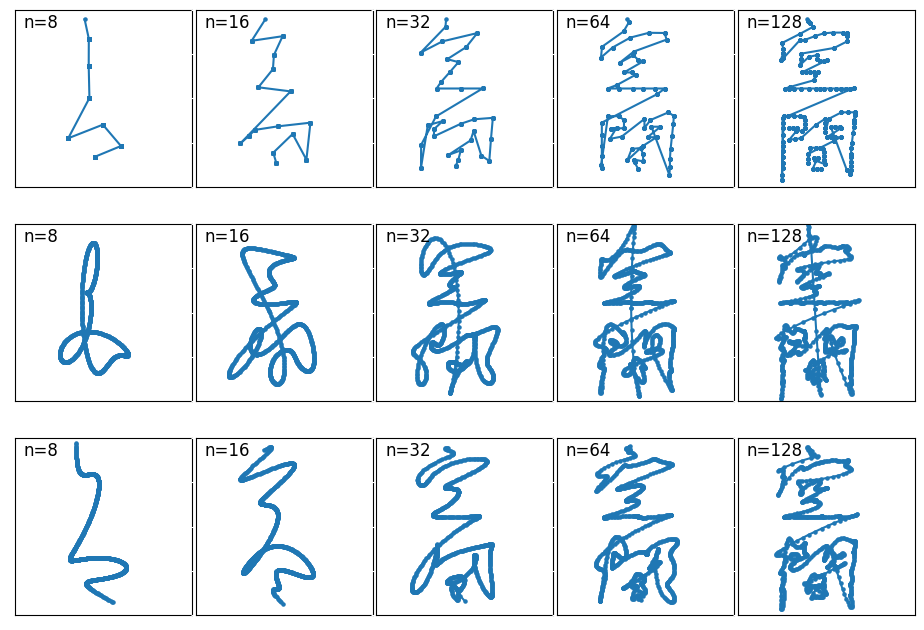

In [1]:
from numpy import array, linspace, identity, exp, pi, linalg
from numpy.polynomial.legendre import Legendre
import matplotlib.pyplot as plt

with open('tablet.txt', 'r') as fd:
    y = eval(fd.read())
m = len(y)
x = linspace(0.0, 1.0, m)


def phi1(n): 
    return array([(x0 >= x).astype('int')
                  for x0 in linspace(0, 1, n)]).T


def phi2(n):
    return array([exp(2 * pi * k * 1j * x)
                  for k in range(-n // 2, n // 2 + 1)]).T


def phi3(n):
    return array([Legendre.basis(j, domain=[0, 1])(x)
                  for j in range(n)]).T


fig, axs = plt.subplots(3, 5, figsize=(15, 8))
for i, f in enumerate([phi1, phi2, phi3]):
    for j, n in enumerate([8, 16, 32, 64, 128]):
        ax = axs[i, j]
        c = linalg.lstsq(f(n), y, rcond=None)[0]
        z = f(n).dot(c)
        ax.scatter(z.real, z.imag, s=5), ax.plot(z.real, z.imag)
        ax.axis('scaled'), ax.set_xlim(-1, 1), ax.set_ylim(-1, 1)
        ax.tick_params(labelbottom=False, labelleft=False,
                       color='white')
        ax.text(-0.9, 0.8, f'n={n}', fontsize=12)

plt.subplots_adjust(left=0.2, right=0.8, bottom=0.1, top=0.9,
                    hspace=0.01, wspace=0.02)

---
**Program:** [moji2d.py](./10.1/moji2d.py)

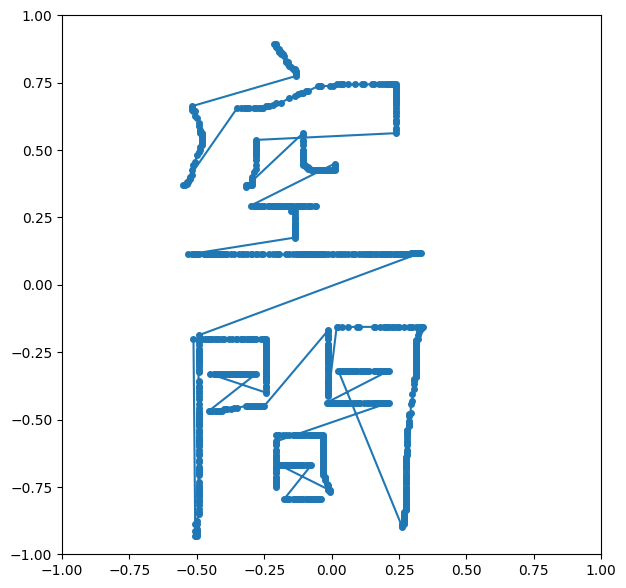

In [1]:
from numpy import array, linspace, identity, exp, pi, linalg, ones
from numpy.polynomial.legendre import Legendre
import matplotlib.pyplot as plt

with open('tablet.txt', 'r') as fd:
    data = eval(fd.read())
m = len(data)
t = linspace(0.0, 1.0, m)
x, y = zip(*[(z.real, z.imag) for z in data])

plt.figure(figsize=(7, 7))
plt.axis('scaled'), plt.xlim(-1, 1), plt.ylim(-1, 1)
plt.plot(x, y)
plt.scatter(x, y, s=16)

---
**Program:** [moji3d.py](./10.1/moji3d.py)

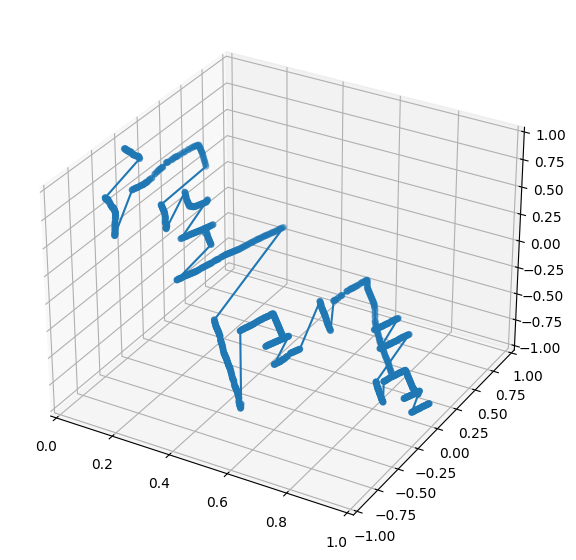

In [1]:
from numpy import array, linspace, identity, exp, pi, linalg, ones
from numpy.polynomial.legendre import Legendre
import matplotlib.pyplot as plt

with open('tablet.txt', 'r') as fd:
    data = eval(fd.read())
m = len(data)
t = linspace(0.0, 1.0, m)
x, y = zip(*[(z.real, z.imag) for z in data])

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='3d')
ax.set_xlim(0, 1), ax.set_ylim(-1, 1), ax.set_zlim(-1, 1)
ax.plot(t, x, y)
ax.scatter(t, x, y, s=16)

## 10.2. Generalized inverse and singular value decomposition

[mapping.py](./10.2/mapping.py)

[![mapping.pdf](./10.2/thumbnails/thumb_mapping.png)](./10.2/mapping.pdf)

---

**Program:** [svd1.py](./10.2/svd1.py)

In [1]:
from numpy import array, diag, zeros
from numpy.linalg import pinv, svd

A = array([[1, 2], [3, 4], [5, 6], [7, 8]])
print(pinv(A))
U1, S, U2 = svd(A)
Z = zeros((4, 2))
Z[:2, :2] = diag(S)
print(U1.dot(Z.dot(U2)))

[[-1.00000000e+00 -5.00000000e-01  1.01325813e-15  5.00000000e-01]
 [ 8.50000000e-01  4.50000000e-01  5.00000000e-02 -3.50000000e-01]]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]



---
**Program:** [svd2.py](./10.2/svd2.py)

In [1]:
from numpy import array, sqrt, trace, diag, linalg

A = array([[1, 2], [3, 4]])
U, S, V = linalg.svd(A)
A1 = V.T.dot(diag(S).dot(V))

print(trace(A1))
print(S.sum())
print(linalg.norm(A, ord='nuc'))

print(sqrt(trace(A.T.dot(A))))
print(sqrt((A**2).sum()))
print(linalg.norm(A, ord='fro'))

print(S.max()/S.min())
print(linalg.cond(A))
B = linalg.inv(A)
print(linalg.norm(A, ord=2)*linalg.norm(B, ord=2))

5.830951894845301
5.8309518948453
5.8309518948453
5.477225575051661
5.477225575051661
5.477225575051661
14.933034373659265
14.933034373659265
14.93303437365925


## 10.3. Tensor product

[Untitled.ipynb](./10.3/Untitled.ipynb)

In [1]:
x = [1, 2]
y = [3, 4, 5]
[[a * b for b in y] for a in x]

[[3, 4, 5], [6, 8, 10]]

In [2]:
from numpy import dot, reshape, outer, tensordot
dot(reshape(x, (2, 1)), reshape(y, (1, 3)))

array([[ 3,  4,  5],
       [ 6,  8, 10]])

In [3]:
outer(x, y)

array([[ 3,  4,  5],
       [ 6,  8, 10]])

In [4]:
tensordot(x, y, axes=0)

array([[ 3,  4,  5],
       [ 6,  8, 10]])

---
[Untitled1.ipynb](./10.3/Untitled1.ipynb)

In [1]:
from sympy import Matrix
x = Matrix([1, 2])
y = Matrix([3, 4, 5])
x * y.T

Matrix([
[3, 4,  5],
[6, 8, 10]])

## 10.4. Tensor product representation of vector valued random variables

**Program:** [probab1.py](./10.4/probab1.py)

In [1]:
from numpy import array
from numpy.random import randint, seed

seed(2021)
N = [1, 2, 3, 4, 5, 6]
Omega = [(w1, w2)  for w1 in N for w2 in N]

def omega():
    return Omega[randint(len(Omega))]

def P(w):
    return 1 / len(Omega)

def X(w):
    return array([w[0] + w[1], w[0] - w[1]])

def E(X):
    return sum([X(w) * P(w) for w in Omega])

for n in range(5):
    w = omega()
    print(X(w), end=' ')
print(f'\nE(X)={E(X)}')

[8 0] [2 0] [7 5] [ 9 -1] [9 1] 
E(X)=[ 7.00000000e+00 -8.32667268e-17]


---
**Program:** [probab2.py](./10.4/probab2.py)

In [1]:
from numpy.random import choice, seed

s = 2021
W1 = W2 = [1, 2, 3, 4, 5, 6]

def X(w):
    return w[0] + w[1]

def X1(w1):
    return X((w1, choice(W2)))

seed(s)
for n in range(20):
    w1 = choice(W1)
    print(X1(w1), end=' ')
print()
seed(s)
for n in range(20):
    w = choice(W1), choice(W2)
    print(X(w), end=' ')

11 3 11 10 12 6 8 4 11 6 5 3 7 11 7 5 8 8 6 11 
11 3 11 10 12 6 8 4 11 6 5 3 7 11 7 5 8 8 6 11 

## 10.5. Principal component analysis and KL Expansion

**Program:** [scatter.py](./10.5/scatter.py)

In [1]:
import numpy as np
import vpython as vp
import matplotlib.pyplot as plt

with open('data.csv', 'r') as fd:
    lines = fd.readlines()
data = np.array([eval(line) for line in lines[1:]])

def scatter3d(data):
    o = vp.vec(0, 0, 0)
    vp.curve(pos=[o, vp.vec(100, 0, 0)], color=vp.color.red)
    vp.curve(pos=[o, vp.vec(0, 100, 0)], color=vp.color.green)
    vp.curve(pos=[o, vp.vec(0, 0, 100)], color=vp.color.blue)
    vp.points(pos=[vp.vec(*a) for a in data], radius=3)

def scatter2d(data, savefig=None):
    A = data.T
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for n, B in enumerate([A[[0, 1]], A[[0, 2]], A[[1, 2]]]):
        s = B.dot(B.T)
        cor = s[0, 1] / np.sqrt(s[0, 0]) / np.sqrt(s[1, 1])
        print(f'{cor:.3}')
        axs[n].scatter(B[0], B[1])
    if savefig is not None:
        plt.savefig(f'{savefig}.png', bbox_inches='tight', pad_inches=0.05)
    else:
        plt.show()

<IPython.core.display.Javascript object>

In [2]:
scatter3d(data)

![scatter3d](./10.5/scatter3d.png)


0.966
0.954
0.972


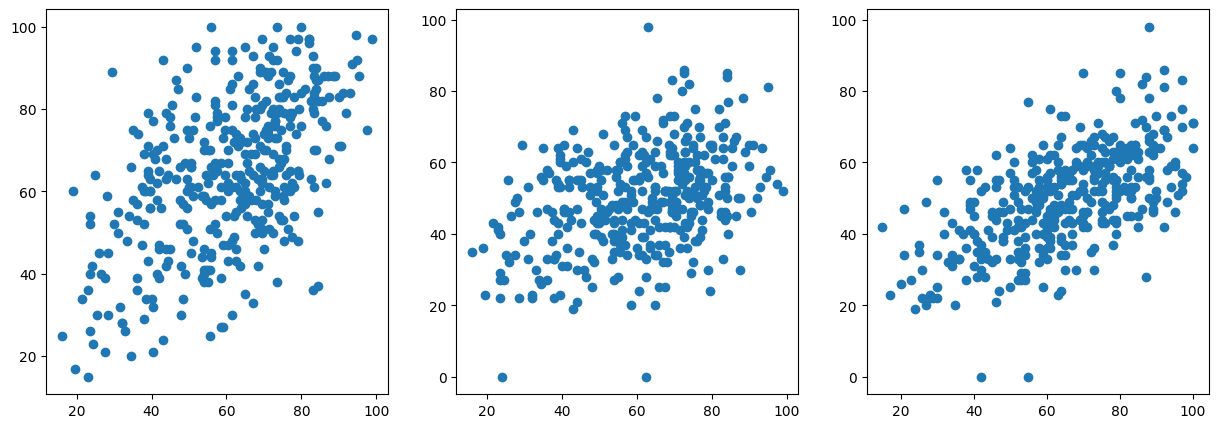

In [3]:
scatter2d(data)

---
**Program:** [principal.py](./10.5/principal.py)

In [4]:
from numpy.linalg import eigh

n = len(data)
mean = sum(data) / n
C = data - mean
A = C.T
AAt = A.dot(C) / n
E, U = eigh(AAt)
print(E)

In [5]:
scatter3d(C.dot(U))

![principal3d](./10.5/principal3d.png)

-7.79e-17
9.64e-17
2.02e-16


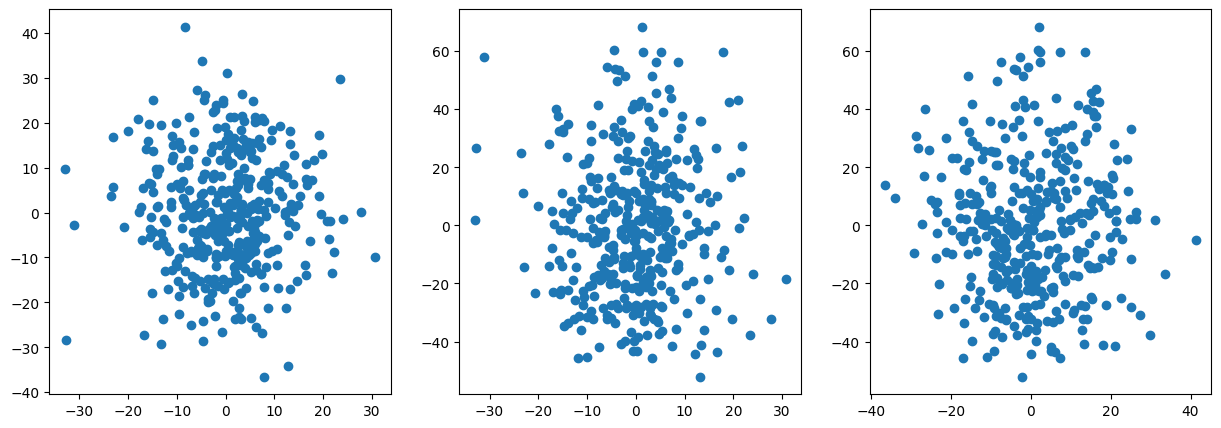

In [6]:
scatter2d(C.dot(U))

---
**Program:** [KL2.py](./10.5/KL2.py)

singular values = [235.13538383 155.21177657   8.09565099   7.8359052 ]
error0 = [0.0614098  0.06428303 0.06365725 0.06560834]
error1 = [0.032575   0.03152683 0.03245869 0.03145176]


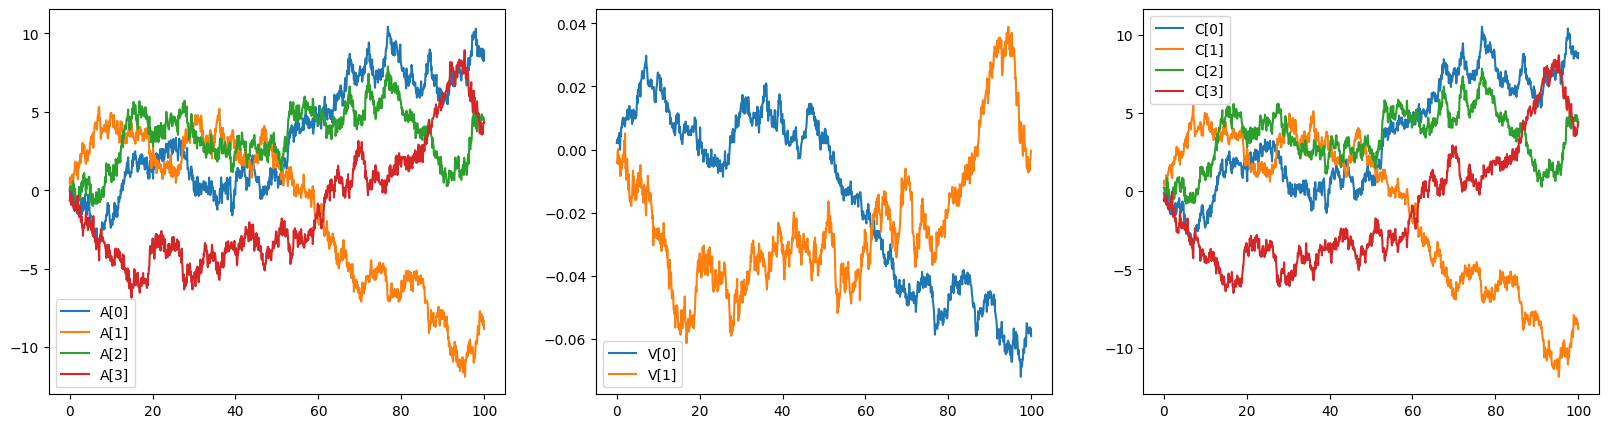

In [1]:
import numpy as np
import matplotlib.pyplot as plt

tmax, N = 100, 1000
dt = tmax / N

np.random.seed(2021)
W = np.random.normal(0, dt, (2, N))
Noise = np.random.normal(0, 0.25, (4, N))
B = W.cumsum(axis=1)
P = np.array([[1, 2], [1, -2], [2, 1], [-2, 1]])
A0 = P.dot(B)
A = A0 + Noise
U, S, V = np.linalg.svd(A)
print(f'singular values = {S}')

C = U[:, :2].dot(np.diag(S[:2]).dot(V[:2, :]))
plt.figure(figsize=(20, 5))
T = np.linspace(0, tmax, N)
plt.subplot(131)
for i in range(4):
    plt.plot(T, A[i], label=f'A[{i}]')
    plt.legend()
plt.subplot(132)
for i in range(2):
    plt.plot(T, V[i], label=f'V[{i}]')
    plt.legend()
plt.subplot(133)
for i in range(4):
    plt.plot(T, C[i], label=f'C[{i}]')
    plt.legend()
error0 = np.sum((A0 - A)**2, axis=1) / N
error1 = np.sum((A0 - C)**2, axis=1) / N
print(f'error0 = {error0}')
print(f'error1 = {error1}')

---
**Program:** [mnist_KL2.py](./10.5/mnist_KL2.py)

[1.48930635e+03 1.85837037e+02 1.34451132e+02 9.17686967e+01
 4.34910995e+01 2.04790492e+01 3.31597235e+00 2.32263391e+00
 1.73833429e+00 1.20358929e+00 1.02720629e+00 7.28951867e-01
 3.98445330e-01 3.39177688e-01 2.99620968e-01 2.30328730e-01
 2.10547952e-01 1.69170802e-01 1.19269451e-01 8.82585225e-02
 3.93707238e-02 3.29515409e-02 1.80071950e-02 5.75352227e-03
 2.68911864e-03 1.19445452e-03 1.68601208e-04 4.48087623e-05]


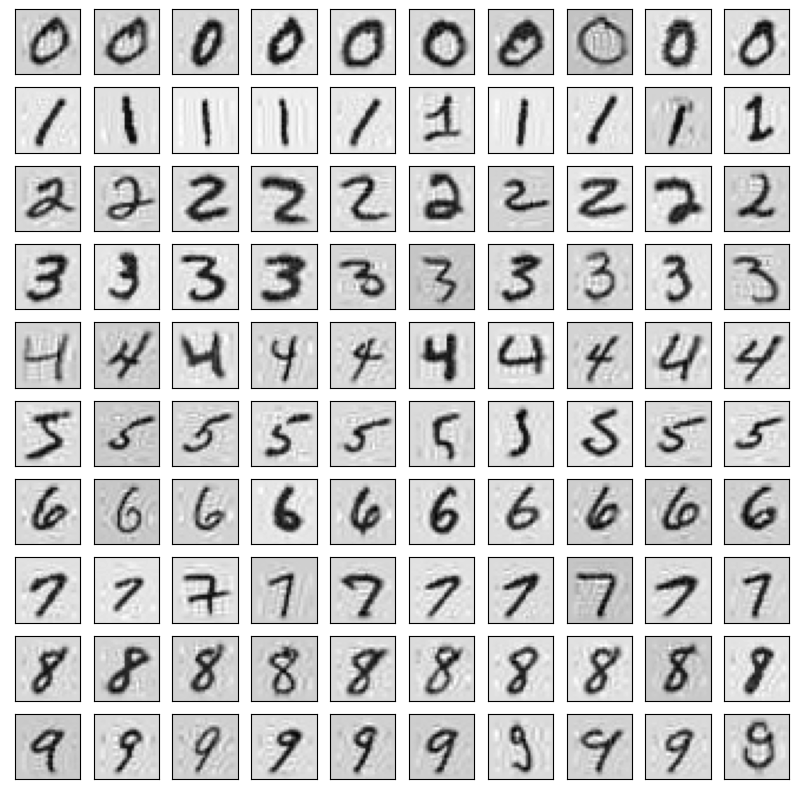

In [1]:
import numpy as np
import matplotlib.pyplot as plt

cutoff = 14
N = 60000
with open('train-images.bin', 'rb') as fd:
    X = np.fromfile(fd, 'uint8', -1)[16:]
X = X.reshape((N, 28, 28))
with open('train-labels.bin', 'rb') as fd:
    Y = np.fromfile(fd, 'uint8', -1)[8:]
D = {y: [] for y in set(Y)}
for x, y in zip(X, Y):
    D[y].append(x)

A = sum([x.astype('float') for x in X]) / N
U, Sigma, V = np.linalg.svd(A)
print(Sigma)

def proj(X, U, V, k):
    U1, V1 = U[:, :k], V[:k, :]
    P, Q = U1.dot(U1.T), V1.T.dot(V1)
    return P.dot(X.dot(Q))


fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for y in D:
    for k in range(10):
        ax = axs[y][k]
        A = D[y][k]
        B = proj(A, U, V, cutoff)
        ax.imshow(255 - B, 'gray')
        ax.tick_params(labelbottom=False, labelleft=False,
                       color='white')

## 10.6. Estimation of random variables by linear regression model

**Program:** [ginv.py](./10.6/ginv.py)

In [1]:
from sympy import *
s = Symbol(r'\sigma', positive=True)
t = Symbol(r'\tau', positive=True)
A = Matrix([[s, 0, t, 0], [0, s, 0, t]])

B = A.pinv()
print(latex(simplify(B)))

\left[\begin{matrix}\frac{\sigma}{\sigma^{2} + \tau^{2}} & 0\\0 & \frac{\sigma}{\sigma^{2} + \tau^{2}}\\\frac{\tau}{\sigma^{2} + \tau^{2}} & 0\\0 & \frac{\tau}{\sigma^{2} + \tau^{2}}\end{matrix}\right]


$\left[\begin{matrix}\frac{\sigma}{\sigma^{2} + \tau^{2}} & 0\\0 & \frac{\sigma}{\sigma^{2} + \tau^{2}}\\\frac{\tau}{\sigma^{2} + \tau^{2}} & 0\\0 & \frac{\tau}{\sigma^{2} + \tau^{2}}\end{matrix}\right]$

---
**Program:** [estimate.py](./10.6/estimate.py)

U-V: 1.2742691622021318
U-W: 1.1379182601867972


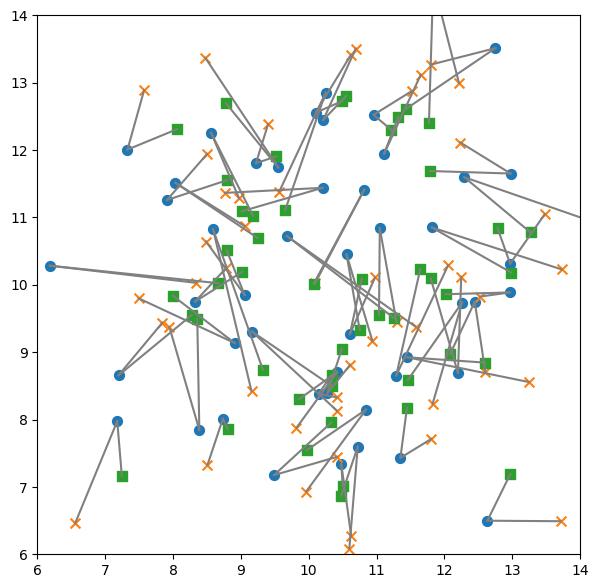

In [1]:
from numpy import array, random, linalg, sqrt
import matplotlib.pyplot as plt

random.seed(2021)
n = 50
mu, sigma, tau = 10, 2, 1

U1, U2 = random.normal(mu, sigma, (2, n))
Error1, Error2 = random.normal(0, tau, (2, n))
V1, V2 = U1 + Error1, U2 + Error2
W1 = (sigma**2 * V1 + tau**2 * mu) / (sigma**2 + tau**2)
W2 = (sigma**2 * V2 + tau**2 * mu) / (sigma**2 + tau**2)

plt.figure(figsize=(7, 7))
plt.xlim(mu-sigma*2, mu+sigma*2), plt.ylim(mu-sigma*2, mu+sigma*2)
plt.scatter(U1, U2, s=50, marker='o')
plt.scatter(V1, V2, s=50, marker='x')
plt.scatter(W1, W2, s=50, marker='s')

UV = UW = 0
for u1, u2, v1, v2, w1, w2 in zip(U1, U2, V1, V2, W1, W2):
    plt.plot([u1, v1], [u2, v2], color='gray')
    plt.plot([u1, w1], [u2, w2], color='gray')
    UV += sqrt((u1 - v1)**2 + (u2 - v2)**2)
    UW += sqrt((u1 - w1)**2 + (u2 - w2)**2)

print(f'U-V: {UV / n}')
print(f'U-W: {UW / n}')

---

**Program:** [estimate2.py](./10.6/estimate2.py)

(y-x)^2 = 0.9032093121921972
(z-x)^2 = 0.4855954143719857


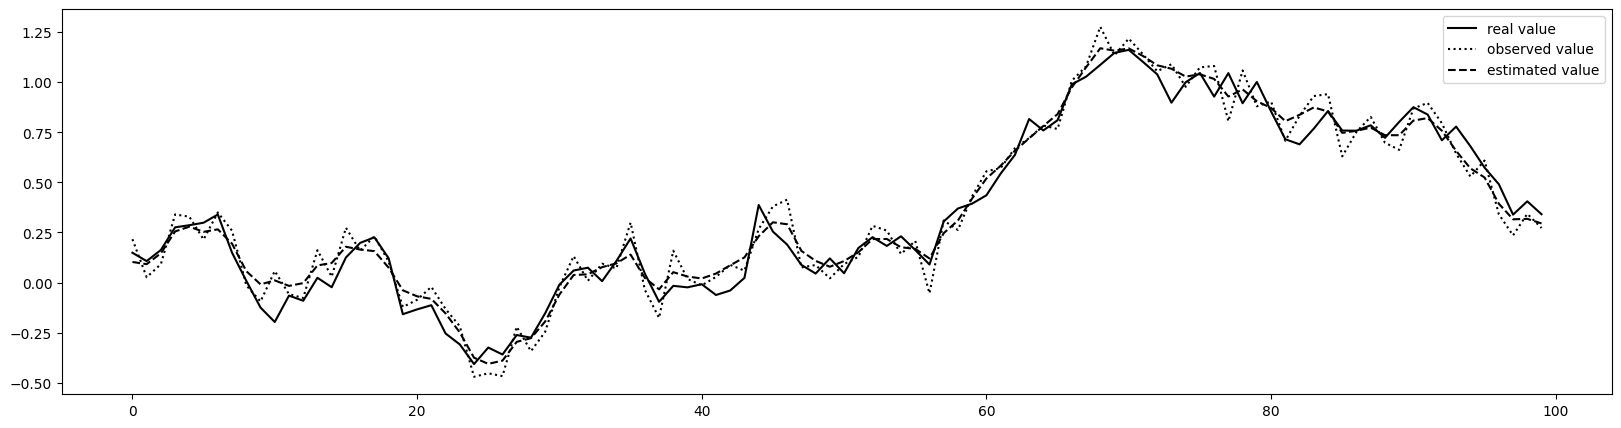

In [1]:
from numpy import zeros, arange, random, linalg
import matplotlib.pyplot as plt

N, rho, sigma, tau = 100, 1.0, 0.1, 0.1
random.seed(2021)

x, y = zeros(N), zeros(N)
for i in range(N):
    x[i] = rho*x[i - 1] + sigma*random.normal(0, 1)
    y[i] = x[i] + tau*random.normal(0, 1)

A = zeros((N, 2 * N))
for i in range(N):
    for j in range(i + 1):
        A[i, j] = rho**(i - j) * sigma
    A[i, N + i] = tau
B = linalg.pinv(A)

v = B.dot(y)
z = zeros(N)
for i in range(N):
    z[i] = rho*z[i - 1] + sigma*v[i]
print(f'(y-x)^2 = {sum((y-x) ** 2)}')
print(f'(z-x)^2 = {sum((z-x) ** 2)}')

plt.figure(figsize=(20, 5))
T = arange(N)
plt.plot(T, x, color='black', linestyle = 'solid', label='real value')
plt.plot(T, y, color='black', linestyle = 'dotted', label='observed value')
plt.plot(T, z, color='black', linestyle = 'dashed', label='estimated value')
plt.legend()

## 10.7. Kalman filter

**Program:** [kalman.py](./10.7/kalman.py)

(y-x)^2 = 0.9032093121921977
(z-x)^2 = 0.6551470144698649


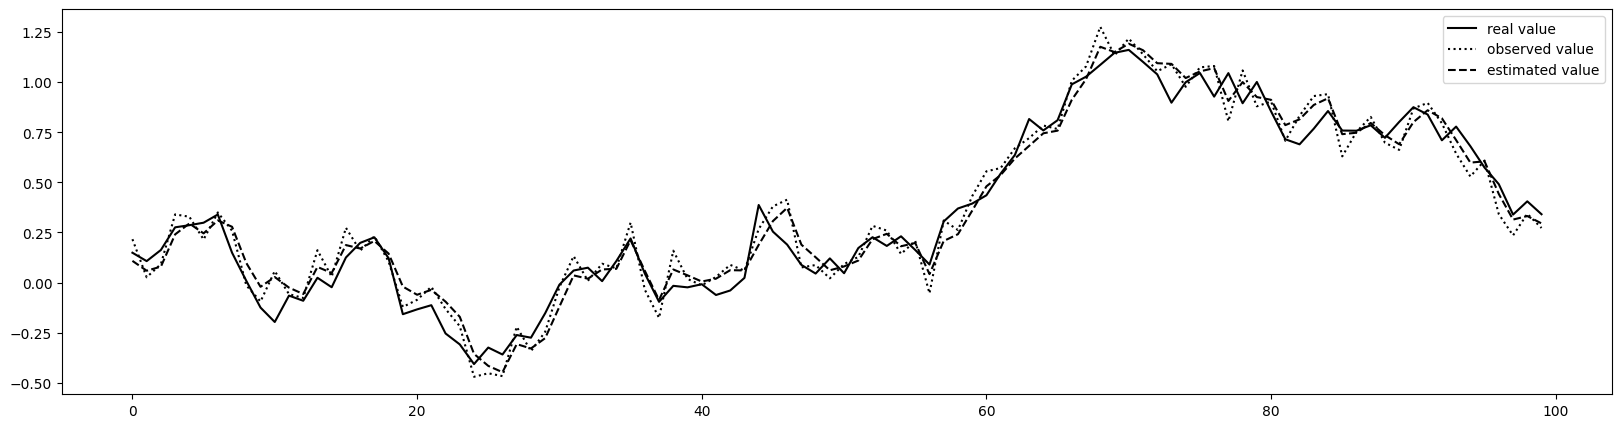

In [1]:
from numpy import *
import matplotlib.pyplot as plt

random.seed(2021)
N, r, s, t = 100, 1.0, 0.1, 0.1
T = range(N)

x, y, z = zeros(N), zeros(N), zeros(N)
a = s**2
for i in range(N):
    x[i] = r * x[i - 1] + s * random.normal(0, 1)
    y[i] = x[i] + t * random.normal(0, 1)
    z[i] = r * z[i - 1] + a / (t**2 + a) * (y[i] - r * z[i - 1])
    c = a - a**2 / (t**2 + a)
    a = r * c + s**2
print(f'(y-x)^2 = {sum((y-x)**2)}')
print(f'(z-x)^2 = {sum((z-x)**2)}')

plt.figure(figsize=(20, 5))
plt.plot(T, x, color='black', linestyle = 'solid', label='real value')
plt.plot(T, y, color='black', linestyle = 'dotted', label='observed value')
plt.plot(T, z, color='black', linestyle = 'dashed',label='estimated value')
plt.legend()